In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readyCSVFile(RCPData, Set):
    RCPNew = RCPData.rename({0: 'Year', 1: 'CO2 Annual Emissions(PgC/yr)',
                 2: 'Atmospheric CO2(PgC)',3: 'Ocean Alkalinity(µmol/kg)',
                 4:'Surface CO3 (µmol/kg)', 5: 'Carbonate Saturation State' + Set }, axis=1)
    RCPNew['Year'] = -1 * RCPNew['Year']
    RCPFinal = RCPNew.set_index('Year')
    return RCPFinal

In [3]:
#calculate total emmissions for all of the RCP scenarios
RCP_26 = pd.read_csv('RCP26.txt', header = None,sep = '\s+')
RCP_45 = pd.read_csv('RCP45.txt', header = None,sep = '\s+')
RCP_60 = pd.read_csv('RCP6.txt', header = None,sep = '\s+')
RCP_85 = pd.read_csv('RCP85.txt', header = None,sep = '\s+')
#2nd is CO2 emissions,
#3rd is atmospheric CO2 concentrations, 
#4th is alkalinity of the surface, 
#5th is carbonate ion of the surface, (surface CO3 (µmol/kg))
#6th is omega at the surface
RCPSet = [RCP_26, RCP_45, RCP_60, RCP_85]
RCP_26S = readyCSVFile(RCP_26,'26')
RCP_45S = readyCSVFile(RCP_45,'45')
RCP_60S = readyCSVFile(RCP_60,'60')
RCP_85S = readyCSVFile(RCP_85,'85')

#RCP_26= RCP_26.rename({0: 'Year', 1: 'CO2 Annual Emissions(PgC/yr)',
#                 2: 'Atmospheric CO2(PgC)',3: 'Ocean Alkalinity(µmol/kg)',
#                 4:'Surface CO3 (µmol/kg)', 5: 'Carbonate Saturation State' }, axis=1)
#RCP_45= RCP_45.rename({0: 'Year', 1: 'CO2 Annual Emissions(PgC/yr)',
#                 2: 'Atmospheric CO2(PgC)',3: 'Ocean Alkalinity(µmol/kg)',
#                4:'Surface CO3 (µmol/kg)', 5: 'Carbonate Saturation State' }, axis=1)
#RCP_60= RCP_60.rename({0: 'Year', 1: 'CO2 Annual Emissions(PgC/yr)',
#                 2: 'Atmospheric CO2(PgC)',3: 'Ocean Alkalinity(µmol/kg)',
#                 4:'Surface CO3 (µmol/kg)', 5: 'Carbonate Saturation State' }, axis=1)
#RCP_85= RCP_85.rename({0: 'Year', 1: 'CO2 Annual Emissions(PgC/yr)',
          #       2: 'Atmospheric CO2(PgC)',3: 'Ocean Alkalinity(µmol/kg)',
           #      4:'Surface CO3 (µmol/kg)', 5: 'Carbonate Saturation State' }, axis=1)


In [56]:
def findYearlyEmissions(RCPData):
    RCPDataTotalEmissions = RCPData['CO2 Annual Emissions(PgC/yr)'].sum()
    return RCPDataTotalEmissions/121
def getAlkalinityRequired(RCPSC, Set):
    RCPSC = RCPSC.drop(['Atmospheric CO2(PgC)',
                              'Ocean Alkalinity(µmol/kg)', 'Surface CO3 (µmol/kg)', 'Carbonate Saturation State' + Set], axis = 1)
    RCPSC['CO2 Annual Emissions(PgC/yr)'] = RCPSC['CO2 Annual Emissions(PgC/yr)'] * 2.0E-3 * 3.14E16
    RCPSC = RCPSC.rename({'CO2 Annual Emissions(PgC/yr)' : 'Alkalinity mol input'}, axis = 1)
    return RCPSC.iloc[40:121]

In [57]:
#YearlyAlkalinity26 = RCP_26S[['CO2 Annual Emissions(PgC/yr)']]
#YearlyAlkalinity26['CO2 Annual Emissions(PgC/yr)'] = YearlyAlkalinity26['CO2 Annual Emissions(PgC/yr)'] * 2.0E-3 * 3.14E16
#YearlyAlkalinity
#YearlyAlkalinity262020 = 
#RCP26Emissions = RCP_26S.drop(['Atmospheric CO2(PgC)',
                              #'Ocean Alkalinity(µmol/kg)', 'Surface CO3 (µmol/kg)', 'Carbonate Saturation State' + '26'], axis = 1)
Yearly26Alkalinity = getAlkalinityRequired(RCP_26S, '26')
Yearly26Alkalinity

,Alkalinity mol input
Year,
2020,6.241416e+14
2021,6.443531e+14
2022,6.443531e+14
2023,6.443531e+14
2024,6.443531e+14
...,...
2096,-1.683040e+13
2097,-1.683040e+13
2098,-1.683040e+13


In [58]:
Yearly45Alkalinity = getAlkalinityRequired(RCP_45S, '45')
Yearly45Alkalinity

,Alkalinity mol input
Year,
2020,6.241416e+14
2021,4.951026e+14
2022,4.951026e+14
2023,4.951026e+14
2024,4.951026e+14
...,...
2096,6.019506e+14
2097,6.019506e+14
2098,6.019506e+14


In [60]:
Yearly60Alkalinity = getAlkalinityRequired(RCP_60S, '60')
Yearly60Alkalinity

,Alkalinity mol input
Year,
2020,6.241416e+14
2021,4.951152e+14
2022,4.951152e+14
2023,4.951152e+14
2024,4.951152e+14
...,...
2096,9.147448e+14
2097,9.147448e+14
2098,9.147448e+14


In [62]:
Yearly85Alkalinity = getAlkalinityRequired(RCP_85S, '85')
Yearly85Alkalinity

,Alkalinity mol input
Year,
2020,6.241416e+14
2021,4.951152e+14
2022,4.951152e+14
2023,4.951152e+14
2024,4.951152e+14
...,...
2096,1.513292e+15
2097,1.513292e+15
2098,1.513292e+15


In [79]:
total = pd.concat([Yearly45Alkalinity, Yearly85Alkalinity], axis = 1)
#total = pd.concat([total, Yearly60Alkalinity], axis = 1)
#total = pd.concat([total, Yearly85Alkalinity], axis = 1)
total['Total'] = total.sum(axis=1)
total['Total'] = total['Total']/2
totalOnly = total['Total']
totalOnly
#totalOnly.to_csv('AlkalinityScenarioJackV2',header = None, index=True, sep='\t', mode='a')

Year
2020    6.241416e+14
2021    4.951089e+14
2022    4.951089e+14
2023    4.951089e+14
2024    4.951089e+14
            ...     
2096    1.057621e+15
2097    1.057621e+15
2098    1.057621e+15
2099    1.057621e+15
2100    1.057621e+15
Name: Total, Length: 81, dtype: float64

In [92]:
RCP_26S
#RCP_26TotalEmissions = RCP_26S['CO2 Annual Emissions(PgC/yr)'].sum()

#RCP_26YearlyEmissions = RCP_26TotalEmissions/121
RCP_26YearlyEmissions = findYearlyEmissions(RCP_26S)
x = RCP_26YearlyEmissions * 2.0E-3 * 3.14E16
'{:.2e}'.format(x)


'3.08e+14'

In [93]:
RCP_45S

#RCP_26TotalEmissions = RCP_26S['CO2 Annual Emissions(PgC/yr)'].sum()

#RCP_26YearlyEmissions = RCP_26TotalEmissions/121
RCP_45YearlyEmissions = findYearlyEmissions(RCP_45S)
x = RCP_45YearlyEmissions * 2.0E-3 * 3.14E16
'{:.2e}'.format(x)

'5.74e+14'

In [94]:
RCP_60S
#RCP_26TotalEmissions = RCP_26S['CO2 Annual Emissions(PgC/yr)'].sum()

#RCP_26YearlyEmissions = RCP_26TotalEmissions/121
RCP_60YearlyEmissions = findYearlyEmissions(RCP_60S)
x = RCP_60YearlyEmissions * 2.0E-3 * 3.14E16
'{:.2e}'.format(x)

'5.89e+14'

In [95]:
RCP_85S
#RCP_26TotalEmissions = RCP_26S['CO2 Annual Emissions(PgC/yr)'].sum()

#RCP_26YearlyEmissions = RCP_26TotalEmissions/121
RCP_85YearlyEmissions = findYearlyEmissions(RCP_85S)
x = RCP_85YearlyEmissions * 2.0E-3 * 3.14E16
'{:.2e}'.format(x)

'7.61e+14'

In [96]:
RCP_26S

,CO2 Annual Emissions(PgC/yr),Atmospheric CO2(PgC),Ocean Alkalinity(µmol/kg),Surface CO3 (µmol/kg),Carbonate Saturation State26
Year,,,,,
1980,5.28258,292.584,2258.74,168.938,4.20975
1981,5.13855,294.759,2258.74,168.289,4.19357
1982,5.10026,296.881,2258.74,167.585,4.17604
1983,5.14808,299.004,2258.74,166.858,4.15792
1984,5.29806,301.175,2258.74,166.111,4.13931
...,...,...,...,...,...
2096,-0.26800,476.698,2258.76,119.606,2.98049
2097,-0.26800,475.874,2258.76,119.760,2.98431
2098,-0.26800,475.055,2258.76,119.913,2.98813


In [19]:
AllRCPData = pd.concat([RCP_26S, RCP_45S, RCP_60S, RCP_85S], axis = 1)
AllRCPData
AllRCPOmega = AllRCPData.drop(['CO2 Annual Emissions(PgC/yr)','Atmospheric CO2(PgC)',
                              'Ocean Alkalinity(µmol/kg)', 'Surface CO3 (µmol/kg)'], axis = 1)
AllRCPOmegaRe = AllRCPOmega.rename({'Carbonate Saturation State26': '2.6', 'Carbonate Saturation State45': '4.5',
                 'Carbonate Saturation State60': '6.0','Carbonate Saturation State85': '8.5'}, axis=1)
AllRCPOmegaRe

,2.6,4.5,6.0,8.5
Year,,,,
1980,4.20975,4.20975,4.20975,4.20975
1981,4.19357,4.19357,4.19357,4.19357
1982,4.17604,4.17604,4.17604,4.17604
1983,4.15792,4.15792,4.15792,4.15792
1984,4.13931,4.13931,4.13931,4.13931
...,...,...,...,...
2096,2.98049,2.27074,2.25814,1.95898
2097,2.98431,2.26232,2.24377,1.93985
2098,2.98813,2.25397,2.22961,1.92112


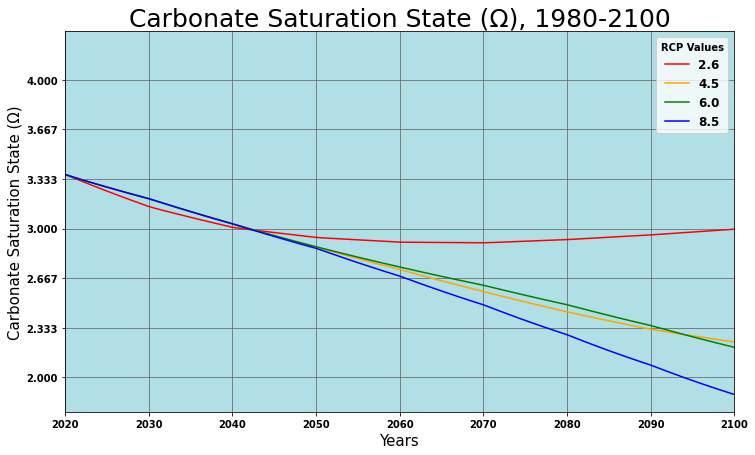

In [33]:
f, ax = plt.subplots(1, figsize = (12,7))
plt.rcParams['font.weight'] = 'bold'

ax.set_xticks(np.arange(2020, 2110, step=10))
ax.set_yticks(np.arange(1, 4.5, step=1/3))

ax.set_xlim(2020,2100)
ax.grid(color = 'dimgray', b = True, which = 'both')

ax.set_facecolor('powderblue')
plotdata(ax,AllRCPOmegaRe['2.6'], '2.6', 'red')
plotdata(ax,AllRCPOmegaRe['4.5'], '4.5', 'orange')
plotdata(ax,AllRCPOmegaRe['6.0'], '6.0', 'green')
plotdata(ax,AllRCPOmegaRe['8.5'], '8.5', 'blue')
ax.set_title('Carbonate Saturation State (Ω), 1980-2100', fontsize = 25)
ax.set_ylabel('Carbonate Saturation State (Ω)', fontsize = 15)
ax.set_xlabel('Years', fontsize = 15)
ax.legend(title = "RCP Values", fontsize = 12)

In [20]:
def plotdata(axe, dataPlot, name, c):
    axe.plot(dataPlot, color = c, label = name)
    #axe.set_title(name + ' 1980-2100', fontsize = 25)
    #axe.set_ylabel(dataPlot.name, fontsize = 15)
    #axe.legend(title = "dataPlot.name")


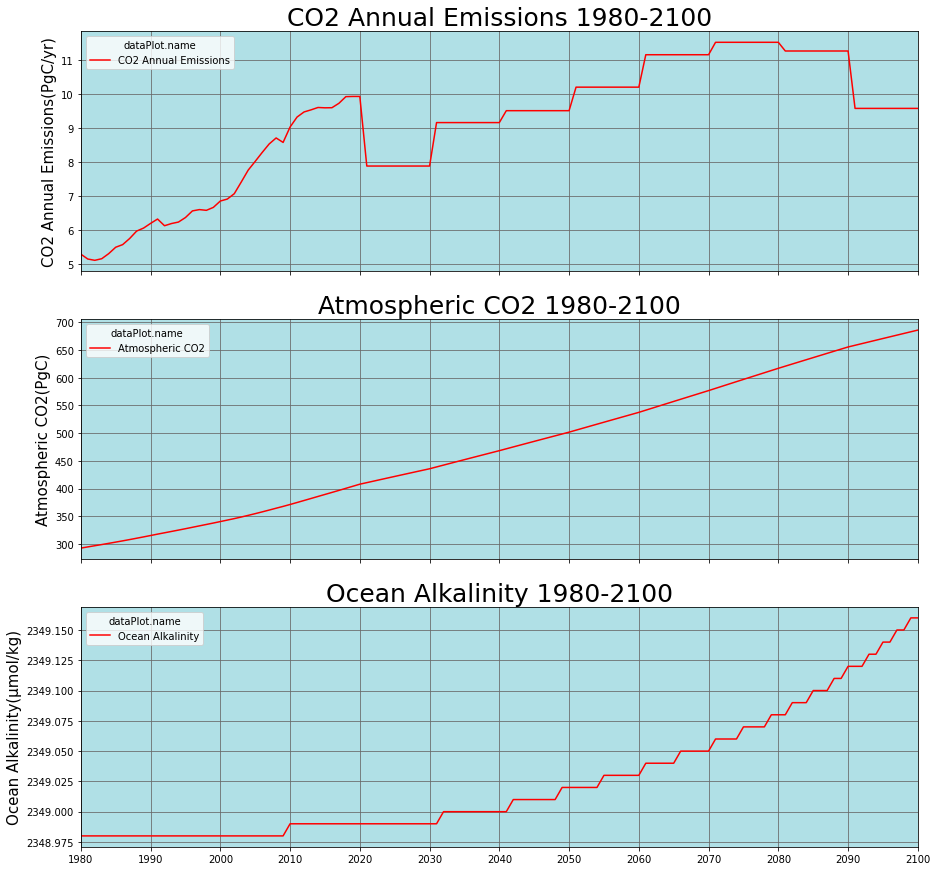

In [56]:
f, ax = plt.subplots(3, sharex=True,figsize = (15,15))

#ax[0].plot(dataYear['CO2 Annual Emissions'])
#ax[1].plot(dataYear['Atmospheric CO2'])
#ax[2].plot(dataYear['Ocean Alkalinity(µmol/kg)'])
#for i in range (0,3):
plotdata(ax[0], dataYear['CO2 Annual Emissions(PgC/yr)'], 'CO2 Annual Emissions') 
plotdata(ax[1], dataYear['Atmospheric CO2(PgC)'], 'Atmospheric CO2') 
plotdata(ax[2], dataYear['Ocean Alkalinity(µmol/kg)'], 'Ocean Alkalinity') 
for i in  ax:
    i.set_xticks(np.arange(1980, 2110, step=10))
    
    i.set_xlim(1980,2100)
    i.grid(color = 'dimgray', b = True, which = 'both')
    i.set_facecolor('powderblue')
#ax[1].scatter(x, y)